In [1]:
using LinearAlgebra, Plots, FFTW

In [2]:
include(".support/operations.jl")

norm (generic function with 15 methods)

In [3]:
# Define the channel vector h and noise covariance matrix R_VV
h = [1, 2, 3]

# Simulate a noise vector v (normally distributed)
v = randn(3)  # Random noise vector with normal distribution

# Example of a spatially colored noise covariance matrix
Rᵥᵥ = [4 1 1; 1 3 1; 1 1 2];

In [4]:
# Compute the matrix square root and its Hermitian (conjugate transpose)
Rᵥᵥ₁₎₂ = √(Symmetric(Rᵥᵥ))  # Ensure R_VV is treated as symmetric
Rᵥᵥ₁₎₂ᴴ= (Rᵥᵥ₁₎₂)ᵀ  # Hermitian of the square root

# Transform the channel vector h
hᵠ = Rᵥᵥ₁₎₂ᴴ * h # h prime

# Transform the noise vector v
vᵠ = (Rᵥᵥ₁₎₂)⁻¹ * v  # Applying the inverse square root transformation

# Compute a basis for the orthogonal complement of h_prime
hᵠₘ = reshape(hᵠ, :, 1)  # Ensure h_prime is in matrix format
h₊ᵠ = nullspace(hᵠₘ)  # Find a basis for the orthogonal complement

# Check if h_prime is orthogonal to h_perp_prime
# |₂ operation is the norm
is_orthogonal = isempty(h₊ᵠ) || |₂(transpose(hᵠₘ) * h₊ᵠ) < 1e-10  # Check if their dot product is close to zero

true

In [5]:
# Output results
println("Transformed channel vector h': ", hᵠ)
println("Transformed noise vector v': ", vᵠ)
println("Covariance of transformed noise (approximate identity matrix?):\n", vᵠ * vᵠ')
println("Is the transformed channel vector orthogonal to its complement? ", is_orthogonal ? "Yes" : "No")

Transformed channel vector h': [3.300816008578297, 4.5415343837732225, 4.947633688796981]
Transformed noise vector v': [0.12919906315352303, -0.16762081191032666, 0.6876491520478526]
Covariance of transformed noise (approximate identity matrix?):
[0.016692397919748032 -0.021656451863847098 0.08884362622289707; -0.021656451863847098 0.028096736585477105 -0.11526430917570872; 0.08884362622289707 -0.11526430917570872 0.4728613563121307]
Is the transformed channel vector orthogonal to its complement? Yes


In [6]:
using LaTeXStrings

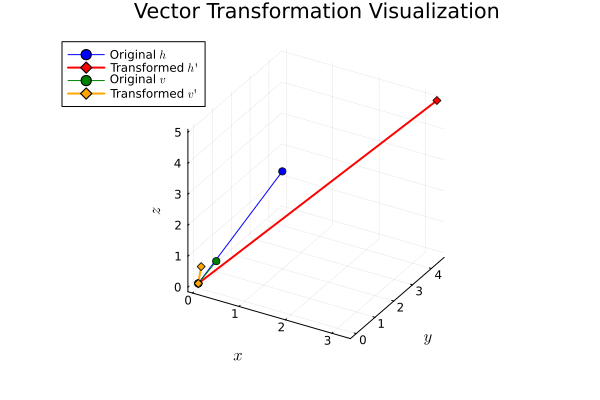

In [7]:
plot3d(
     # label="Original h", color=:blue, linewidth=2, marker=:circle
      xlabel = L"$x$", ylabel = L"$y$", zlabel = L"$z$"
    , title = "Vector Transformation Visualization"
)

# Plot the original and transformed channel vectors
hᵥ = [0, h[1]], [0, h[2]], [0, h[3]]
plot3d!(hᵥ
    , label=L"Original $h$", color=:blue, linewidth=1, marker=:circle
)
hᵠᵥ = [0, hᵠ[1]], [0, hᵠ[2]], [0, hᵠ[3]]
plot3d!(hᵠᵥ
    , label=L"Transformed $h'$", color=:red, linewidth=2, marker=:diamond
)

# Plot the original and transformed noise vectors
vᵥ = [0, v[1]], [0, v[2]], [0, v[3]]
plot3d!(vᵥ
    , label=L"Original $v$", color=:green, linewidth=1, marker=:circle
)
vᵠᵥ = [0, vᵠ[1]], [0, vᵠ[2]], [0, vᵠ[3]]
plot3d!(vᵠᵥ
    , label=L"Transformed $v'$", color=:orange, linewidth=2, marker=:diamond
)

# Display plot
